In [ ]:
import numpy as np
import pandas as pd
import os
import sys
import os
import tensorflow
from keras.layers import *
from keras.optimizers import *
from keras.applications import *
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as k
import keras
from keras.models import Sequential
from tensorflow import keras

In [ ]:
transformation_ratio = 0.05

datagen = ImageDataGenerator(rescale = 1. /255,
                             validation_split = 0.2,

                             horizontal_flip = True,
                             vertical_flip = True)

In [ ]:
train_it = datagen.flow_from_directory("/content/drive/MyDrive/Cataract/Data/Train",
                                       target_size = (224,224),
                                       color_mode = 'rgb',
                                       class_mode = 'categorical',
                                       batch_size = 32,
                                       subset = "training")

val_it = datagen.flow_from_directory("/content/drive/MyDrive/Cataract/Data/Train",
                                       target_size = (224,224),
                                       color_mode = 'rgb',
                                       class_mode = 'categorical',
                                       batch_size = 32,
                                       subset = "validation")

test_it = datagen.flow_from_directory("/content/drive/MyDrive/Cataract/Data/Test",
                                       target_size = (224,224),
                                       color_mode = 'rgb',
                                       class_mode = 'categorical')

Found 8896 images belonging to 3 classes.
Found 2221 images belonging to 3 classes.
Found 2552 images belonging to 3 classes.


In [ ]:
base_model = keras.applications.MobileNetV2(weights ='imagenet', input_shape =(224,224,3),include_top=False)

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
for i in range(len(base_model.layers)):
  print(i,base_model.layers[i])

0 <keras.engine.input_layer.InputLayer object at 0x7fe54cb193f0>
1 <keras.layers.convolutional.conv2d.Conv2D object at 0x7fe4bace5540>
2 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fe4bace44f0>
3 <keras.layers.activation.relu.ReLU object at 0x7fe4bace58d0>
4 <keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x7fe4bace6350>
5 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fe4bace7b80>
6 <keras.layers.activation.relu.ReLU object at 0x7fe4bace6da0>
7 <keras.layers.convolutional.conv2d.Conv2D object at 0x7fe4babb4e80>
8 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fe4babb6590>
9 <keras.layers.convolutional.conv2d.Conv2D object at 0x7fe4babb55d0>
10 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fe4babb7610>
11 <keras.layers.activation.relu.ReLU object at 0x7fe4babb7520>
12 <keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at

In [ ]:
ocl1 = Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3))(base_model.output)
bn1 = BatchNormalization()(ocl1)
mp1 = MaxPooling2D(pool_size=(2, 2))(bn1)
do1 = Dropout(0.17)(mp1)
ocl2 = Conv2D(64, (2, 2), activation='relu')(do1)
bn2 = BatchNormalization()(ocl2)

al1 = GlobalAveragePooling2D()(bn2)

fc1 = Dense(64, activation='relu')(al1)

fc2 = Dense(32,activation='relu')(fc1)

fc3 = Dense(32,activation='relu')(fc2)

al2 = BatchNormalization()(fc3)

all2 = Dropout(0.3)(al2)
fc2 = Dense(3, activation='softmax', name='preds')(all2)

In [ ]:
Cataract_Model = Model(inputs = base_model.input,outputs = fc2)

In [ ]:
Cataract_Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
Cataract_Model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
for i in range(len(Cataract_Model.layers)):
  print(i,Cataract_Model.layers[i])

0 <keras.engine.input_layer.InputLayer object at 0x7fe54cb193f0>
1 <keras.layers.convolutional.conv2d.Conv2D object at 0x7fe4bace5540>
2 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fe4bace44f0>
3 <keras.layers.activation.relu.ReLU object at 0x7fe4bace58d0>
4 <keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x7fe4bace6350>
5 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fe4bace7b80>
6 <keras.layers.activation.relu.ReLU object at 0x7fe4bace6da0>
7 <keras.layers.convolutional.conv2d.Conv2D object at 0x7fe4babb4e80>
8 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fe4babb6590>
9 <keras.layers.convolutional.conv2d.Conv2D object at 0x7fe4babb55d0>
10 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fe4babb7610>
11 <keras.layers.activation.relu.ReLU object at 0x7fe4babb7520>
12 <keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at

In [ ]:
for ix in range(148):
  Cataract_Model.layers[ix].trainable = False

In [ ]:
mc = ModelCheckpoint('/content/drive/MyDrive/Cataract/MobileNetV2_FineTune.h5', monitor='val_accuracy', mode = 'max', verbose = 1, save_best_only = True )
history = Cataract_Model.fit_generator(generator = train_it,
                              epochs = 20,
                              validation_data = val_it,
                              callbacks=mc)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import cv2
import matplotlib.pyplot as plt

def predict_image_class(image_path):
    # Load your custom model
    Model = tf.keras.models.load_model('/content/drive/MyDrive/Cataract/MobileNetV2_FineTune.h5')

    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, (224, 224))
    image = preprocess_input(image)
    image = tf.expand_dims(image, axis=0)

    # Make the prediction
    predictions = Model.predict(image)
    class_index = tf.argmax(predictions, axis=1)
    class_labels = ['Cataract', 'Normal', 'Not Eye']  # Replace with your actual class labels
    predicted_class = class_labels[class_index[0]]

    return predictions,predicted_class, cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)




1/1 [==============================] - 1s 910ms/step
Predicted Class: Cataract
Prediction Array: [[0.98059916 0.00954679 0.00985402]]


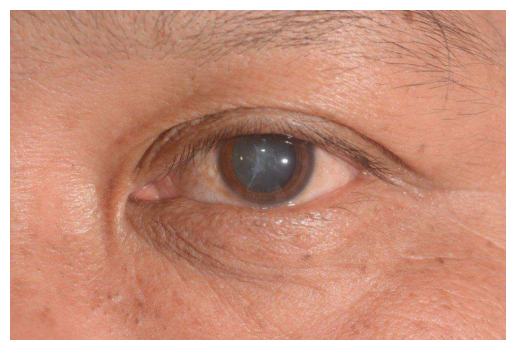

In [ ]:
image_path = '/content/Cataract (1).jpg'
predictions,predicted_class, image = predict_image_class(image_path)
print("Predicted Class:", predicted_class)
print("Prediction Array:", predictions)

plt.imshow(image)
plt.axis('off')
plt.show()

1/1 [==============================] - 1s 1s/step
Predicted Class: Normal
Prediction Array: [[0.00797573 0.9847468  0.00727744]]


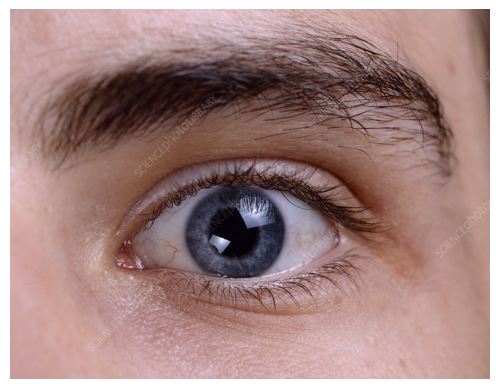

In [ ]:
image_path = '/content/p4200504-800px-wm.jpg'
predictions,predicted_class, image = predict_image_class(image_path)
print("Predicted Class:", predicted_class)
print("Prediction Array:", predictions)

plt.imshow(image)
plt.axis('off')
plt.show()

1/1 [==============================] - 1s 769ms/step
Predicted Class: Not Eye
Prediction Array: [[0.00704215 0.00607698 0.9868809 ]]


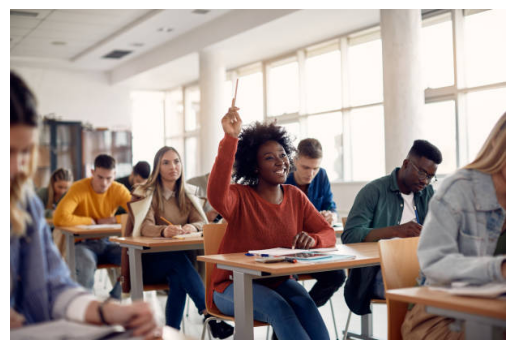

In [ ]:
image_path = '/content/istockphoto-1307457391-612x612 (1).jpg'
predictions,predicted_class, image = predict_image_class(image_path)
print("Predicted Class:", predicted_class)
print("Prediction Array:", predictions)

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array

image_path = '/content/Cataract (1).jpg'
image = cv2.imread(image_path)

image = cv2.resize(image, (224, 224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)


In [ ]:
import tensorflow as tf

Cataract_Model = tf.keras.models.load_model('/content/drive/MyDrive/Cataract/MobileNetV2_FineTune.h5')
layer_outputs = [layer.output for layer in Cataract_Model.layers]
feature_map_model = tf.keras.models.Model(inputs=Cataract_Model.input, outputs=layer_outputs)
feature_maps = feature_map_model.predict(image)


1/1 [==============================] - 1s 1s/step


In [ ]:
channel = 0
for i, (layer_name, fm) in enumerate(zip(Cataract_Model.layers, feature_maps)):
    if fm.ndim == 4:
        plt.figure()
        plt.imshow(fm[0, :, :, channel],cmap='gray')  # Display a single channel of the feature map
        plt.title(f'Layer {i+1}: {layer_name.name}, Channel {channel}')
        plt.show()
    else:
        print(f"Error: Unexpected shape of feature map at layer {i+1}. Expected 4-dimensional array, but got shape {fm.shape}.")

Output hidden; open in https://colab.research.google.com to view.

# Working with layers.

In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report


In [2]:
def build_model(base_model, insert_layer):
    x = base_model.layers[insert_layer].output
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.17)(x)
    x = Conv2D(64, (2, 2), activation='relu')(x)
    x = BatchNormalization()(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    output = Dense(3, activation='softmax', name='preds')(x)

    model = Model(inputs=base_model.input, outputs=output)
    return model


In [3]:
transformation_ratio = 0.05

datagen = ImageDataGenerator(rescale=1. / 255,
                             validation_split=0.2,
                             horizontal_flip=True,
                             vertical_flip=True)

train_it = datagen.flow_from_directory("/content/drive/MyDrive/Cataract/Data/Train",
                                       target_size=(224, 224),
                                       color_mode='rgb',
                                       class_mode='categorical',
                                       batch_size=32,
                                       subset="training")

val_it = datagen.flow_from_directory("/content/drive/MyDrive/Cataract/Data/Train",
                                     target_size=(224, 224),
                                     color_mode='rgb',
                                     class_mode='categorical',
                                     batch_size=32,
                                     subset="validation")

test_it = datagen.flow_from_directory("/content/drive/MyDrive/Cataract/Data/Test",
                                      target_size=(224, 224),
                                      color_mode='rgb',
                                      class_mode='categorical')

Found 8896 images belonging to 3 classes.
Found 2221 images belonging to 3 classes.
Found 2552 images belonging to 3 classes.


In [4]:
def build_and_train_model(base_model, insert_layer, train_data, val_data, test_data):
    model = build_model(base_model, insert_layer)
    for ix in range(insert_layer):
        model.layers[ix].trainable = False
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    mc = ModelCheckpoint(f'model_{insert_layer}.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
    history = model.fit(train_data,
                        epochs=20,
                        validation_data=val_data,
                        callbacks=[mc],
                        verbose=1)

    test_loss, test_accuracy = model.evaluate(test_data)
    y_true = test_data.classes
    y_pred = model.predict(test_data)
    y_pred_classes = np.argmax(y_pred, axis=1)

    report = classification_report(y_true, y_pred_classes, target_names=test_data.class_indices.keys(), output_dict=True)
    result = {
        'insert_layer': insert_layer,
        'train_accuracy': history.history['accuracy'][-1],
        'test_accuracy': test_accuracy,
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score']
    }

    return result

In [ ]:
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', input_shape=(224, 224, 3), include_top=False)
insert_layers = [148, 138, 128, 118, 108, 98]

results = []
for insert_layer in insert_layers:
    result = build_and_train_model(base_model, insert_layer, train_it, val_it, test_it)
    results.append(result)

result_df = pd.DataFrame(results)
result_df

Epoch 1/20
278/278 [==============================] - ETA: 0s - loss: 0.7425 - accuracy: 0.6950
Epoch 1: val_accuracy improved from -inf to 0.92751, saving model to model_148.h5
278/278 [==============================] - 1146s 4s/step - loss: 0.7425 - accuracy: 0.6950 - val_loss: 0.2749 - val_accuracy: 0.9275
Epoch 2/20
278/278 [==============================] - ETA: 0s - loss: 0.2773 - accuracy: 0.9120
Epoch 2: val_accuracy improved from 0.92751 to 0.93877, saving model to model_148.h5
278/278 [==============================] - 53s 192ms/step - loss: 0.2773 - accuracy: 0.9120 - val_loss: 0.1695 - val_accuracy: 0.9388
Epoch 3/20
278/278 [==============================] - ETA: 0s - loss: 0.1870 - accuracy: 0.9412
Epoch 3: val_accuracy improved from 0.93877 to 0.97389, saving model to model_148.h5
278/278 [==============================] - 52s 189ms/step - loss: 0.1870 - accuracy: 0.9412 - val_loss: 0.0919 - val_accuracy: 0.9739
Epoch 4/20
278/278 [==============================] - ETA: 